In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

from datetime import datetime
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, log_loss

import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
complete_scaled_df = pd.read_csv('raw_data/complete_data.csv')

complete_scaled_df = pd.get_dummies(data = complete_scaled_df, columns = ['town', 'flat_type', 'flat_model'], drop_first = True)

complete_scaled_df['test_data'] = complete_scaled_df.apply(lambda x: True if x['month_count'] >= 0.789285714285714 else False, axis = 1)

complete_scaled_df.head()

,month_count,floor_area_sqm,storey,remaining_lease,dist_phpcs,dist_schools,dist_supermarkets,dist_hawkercentres,dist_mrtlrt,dist_city,...,flat_model_new_generation,flat_model_premium_apartment,flat_model_premium_apartment_loft,flat_model_premium_maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type_s1,flat_model_type_s2,test_data
0,0.0,0.241636,0.1250,0.724138,0.122762,0.091766,0.175354,0.127374,0.606052,0.415998,...,1,0,0,0,0,0,0,0,0,False
1,0.0,0.141264,0.0625,0.482759,0.108513,0.061661,0.159084,0.040699,0.075451,0.242882,...,0,0,0,0,0,1,0,0,0,False
2,0.0,0.089219,0.0625,0.517241,0.056266,0.013420,0.101838,0.027133,0.047903,0.239665,...,0,0,0,0,0,1,0,0,0,False
3,0.0,0.104089,0.0000,0.517241,0.062112,0.038810,0.121121,0.023666,0.057945,0.242662,...,0,0,0,0,0,1,0,0,0,False
4,0.0,0.200743,0.2500,0.586207,0.039459,0.137650,0.031636,0.030901,0.036911,0.306523,...,0,0,0,0,0,0,0,0,0,False


In [12]:
complete_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616778 entries, 0 to 616777
Data columns (total 64 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   month_count                        616778 non-null  float64
 1   floor_area_sqm                     616778 non-null  float64
 2   storey                             616778 non-null  float64
 3   remaining_lease                    616778 non-null  float64
 4   dist_phpcs                         616778 non-null  float64
 5   dist_schools                       616778 non-null  float64
 6   dist_supermarkets                  616778 non-null  float64
 7   dist_hawkercentres                 616778 non-null  float64
 8   dist_mrtlrt                        616778 non-null  float64
 9   dist_city                          616778 non-null  float64
 10  int_rate                           616778 non-null  float64
 11  resale_price                       6167

In [13]:
train_test_split_bool = complete_scaled_df.iloc[:, 63]

complete_scaled_df = complete_scaled_df.drop('test_data', axis = 1)

# train_test_split_bool = np.random.choice([True, False], complete_unscaled_df.shape[0], replace = True, p = [0.8, 0.2])
             
x_split = complete_scaled_df.drop('resale_price', axis = 1)

y_split = complete_scaled_df.iloc[:, 11]

y_split_monthly = complete_scaled_df.iloc[:, [0, 11]]

x_train = x_split[~train_test_split_bool]

y_train = y_split[~train_test_split_bool]

x_test = x_split[train_test_split_bool]

y_test = y_split[train_test_split_bool]

y_test_monthly = y_split_monthly[train_test_split_bool]

table_index = {0: 'R2', 1: 'MSE', 2: 'Model Complexity', 3: 'Regularized Cost'}

for i in range(4, len(x_train.columns) + 4):
    
    table_index[i] = f'Coefficient {i - 4}: {x_train.columns[i - 4]}'

y_test

491724    340288.0
491725    334168.0
491726    335000.0
491727    755000.0
491728    349000.0
            ...   
616773    340000.0
616774    400000.0
616775    370000.0
616776    380000.0
616777    765000.0
Name: resale_price, Length: 125054, dtype: float64

In [14]:
linear_simple = linear_model.LinearRegression()

linear_simple.fit(x_train, y_train)

train_y_predict = linear_simple.predict(x_train)

test_y_predict = linear_simple.predict(x_test)

train_mse = mean_squared_error(y_train, train_y_predict)

train_r2 = linear_simple.score(x_train, y_train)

test_mse = mean_squared_error(y_test, test_y_predict)

test_r2 = linear_simple.score(x_test, y_test)
 
print('MSE on train set:', train_mse)
print('R2 on train set:', train_r2)

print('MSE on test set:', test_mse)
print('R2 on test set:', test_r2)

print('\n')

for i, coef in enumerate(linear_simple.coef_):
    
    print(f'{table_index[i + 4]}: {coef}')

MSE on train set: 2967532407.547946
R2 on train set: 0.8419535307899059
MSE on test set: 8058996039.252903
R2 on test set: 0.7130073788394456


Coefficient 0: month_count: 349270.85104395647
Coefficient 1: floor_area_sqm: 487731.94091996405
Coefficient 2: storey: 143627.31853381562
Coefficient 3: remaining_lease: 174013.32709357713
Coefficient 4: dist_phpcs: -34598.089913407275
Coefficient 5: dist_schools: 85622.64636687755
Coefficient 6: dist_supermarkets: -18662.035989775744
Coefficient 7: dist_hawkercentres: -42973.36278229776
Coefficient 8: dist_mrtlrt: -67956.28689159077
Coefficient 9: dist_city: -85310.45461814801
Coefficient 10: int_rate: -87755.40781958634
Coefficient 11: town_bedok: -11082.701792703943
Coefficient 12: town_bishan: 34412.50731459768
Coefficient 13: town_bukit_batok: -28998.756040685555
Coefficient 14: town_bukit_merah: 34844.76215063954
Coefficient 15: town_bukit_panjang: -84136.2817028118
Coefficient 16: town_bukit_timah: 92165.06257793398
Coefficient 17: town

In [15]:
test_months = x_test['month_count'].unique()

test_x_months = []

test_y_months = []

for i in range(len(test_months)):
    
#     print(test_months[i])
    
    exec(f'test_x_{i+1} = x_test[x_test["month_count"] == test_months[i]]')
    
    exec(f'test_y_{i+1} = y_test_monthly[y_test_monthly["month_count"] == test_months[i]].iloc[: , -1]')
    
    exec(f'test_x_months.append(test_x_{i+1})')
    
    exec(f'test_y_months.append(test_y_{i+1})')

# for i in range(len(test_x_months)):
    
#     print(len(test_y_months[0]) == len(test_x_months[0]))


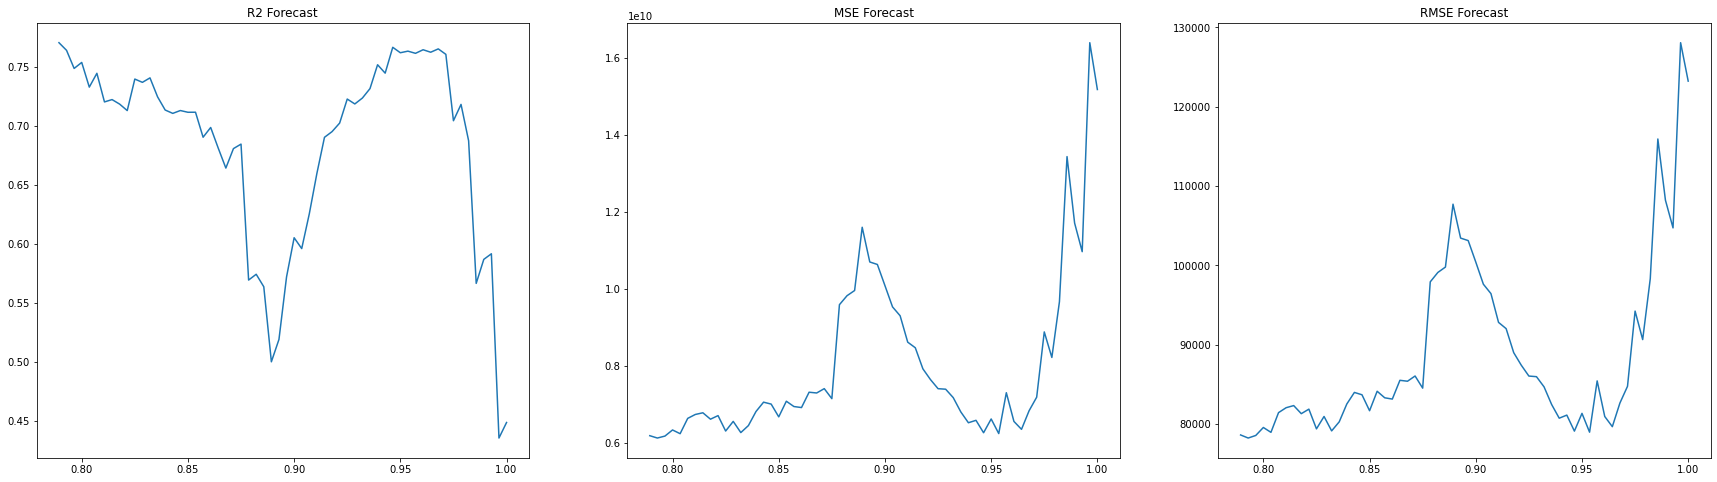

In [18]:
monthly_test_r2 = []

monthly_test_mse = []

for i in range(len(test_months)):
    
    test_y_predict = linear_simple.predict(test_x_months[i])
    
    test_mse = mean_squared_error(test_y_months[i], test_y_predict)

    test_r2 = linear_simple.score(test_x_months[i], test_y_months[i])
    
    monthly_test_r2.append(test_r2)
    
    monthly_test_mse.append(test_mse)
    
exec('monthly_test_rmse = [np.sqrt(i) for i in monthly_test_mse]')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (30, 8))
ax1.plot(test_months, monthly_test_r2)
ax2.plot(test_months, monthly_test_mse)
ax3.plot(test_months, monthly_test_rmse)
ax1.set_title('R2 Forecast')
ax2.set_title('MSE Forecast')
ax3.set_title('RMSE Forecast')
ax1.xlabel = ax2.xlabel = ax3.xlabel = 'Month Count'
ax1.ylabel = 'R2 (SLR)'
ax2.ylabel = 'MSE (SLR)'
ax3.ylabel = 'RMSE (SLR)'


In [6]:
alpha = [0.01, 0.1, 1, 10, 100, 1000]
    
linear_lasso = [linear_model.Lasso(alpha = alpha[i], tol = 1e-01, max_iter = 10000) for i in range(len(alpha))]
linear_ridge = [linear_model.Ridge(alpha = alpha[i], tol = 1e-01, max_iter = 10000) for i in range(len(alpha))]

complete_scaled_df = pd.read_csv('raw_data/complete_data.csv')

complete_scaled_df = pd.get_dummies(data = complete_scaled_df, columns = ['town', 'flat_type', 'flat_model'], drop_first = False)

complete_scaled_df['test_data'] = complete_scaled_df.apply(lambda x: True if x['month_count'] >= 0.789285714285714 else False, axis = 1)

complete_scaled_df.head()

,month_count,floor_area_sqm,storey,remaining_lease,dist_phpcs,dist_schools,dist_supermarkets,dist_hawkercentres,dist_mrtlrt,dist_city,...,flat_model_new_generation,flat_model_premium_apartment,flat_model_premium_apartment_loft,flat_model_premium_maisonette,flat_model_simplified,flat_model_standard,flat_model_terrace,flat_model_type_s1,flat_model_type_s2,test_data
0,0.0,0.241636,0.1250,0.724138,0.122762,0.091766,0.175354,0.127374,0.606052,0.415998,...,1,0,0,0,0,0,0,0,0,False
1,0.0,0.141264,0.0625,0.482759,0.108513,0.061661,0.159084,0.040699,0.075451,0.242882,...,0,0,0,0,0,1,0,0,0,False
2,0.0,0.089219,0.0625,0.517241,0.056266,0.013420,0.101838,0.027133,0.047903,0.239665,...,0,0,0,0,0,1,0,0,0,False
3,0.0,0.104089,0.0000,0.517241,0.062112,0.038810,0.121121,0.023666,0.057945,0.242662,...,0,0,0,0,0,1,0,0,0,False
4,0.0,0.200743,0.2500,0.586207,0.039459,0.137650,0.031636,0.030901,0.036911,0.306523,...,0,0,0,0,0,0,0,0,0,False


In [7]:
lasso_model_outputs = []

lasso_model_coefs = []

for i in range(len(alpha)):
    
    linear_lasso[i].fit(x_train, y_train)
    
    y_predict = linear_lasso[i].predict(x_test)
    
    mse = mean_squared_error(y_test, y_predict)
    
    r2 = linear_lasso[i].score(x_test, y_test)
    
    cplxy = sum([abs(j) for j in linear_lasso[i].coef_])
    
    lasso_model_performance_attributes = [r2, mse, cplxy,  mse + alpha[i] * cplxy]
    
    lasso_model_coefs.append(linear_lasso[i].coef_)
    
    [lasso_model_performance_attributes.append(i) for i in linear_lasso[i].coef_]
    
    lasso_model_outputs.append(lasso_model_performance_attributes)
    
    print('Trained')

lasso_model_outputs_t = np.transpose(lasso_model_outputs)

lasso_model_table = pd.DataFrame(lasso_model_outputs_t, columns = ['alpha = 0.01', 'alpha = 0.1', 'alpha = 1', 'alpha = 10', 'alpha = 100', 'alpha = 1000'])
    
lasso_model_table = lasso_model_table.rename(index = table_index)

print(lasso_model_table.to_string())

Trained
Trained
Trained
Trained
Trained
Trained
                                                   alpha = 0.01   alpha = 0.1     alpha = 1    alpha = 10   alpha = 100  alpha = 1000
R2                                                 6.835171e-01  6.834590e-01  6.826960e-01  6.815101e-01  6.631556e-01  5.589797e-01
MSE                                                8.887108e+09  8.888739e+09  8.910164e+09  8.943466e+09  9.458877e+09  1.238423e+10
Model Complexity                                   4.011115e+06  3.999263e+06  3.891541e+06  3.619717e+06  2.479008e+06  1.447894e+06
Regularized Cost                                   8.887148e+09  8.889139e+09  8.914056e+09  8.979663e+09  9.706777e+09  1.383212e+10
Coefficient 0: month_count                         3.165420e+05  3.165425e+05  3.165467e+05  3.165230e+05  3.164479e+05  3.045852e+05
Coefficient 1: floor_area_sqm                      8.416844e+05  8.416720e+05  8.415783e+05  8.404564e+05  8.258399e+05  6.821929e+05
Coefficient 2:

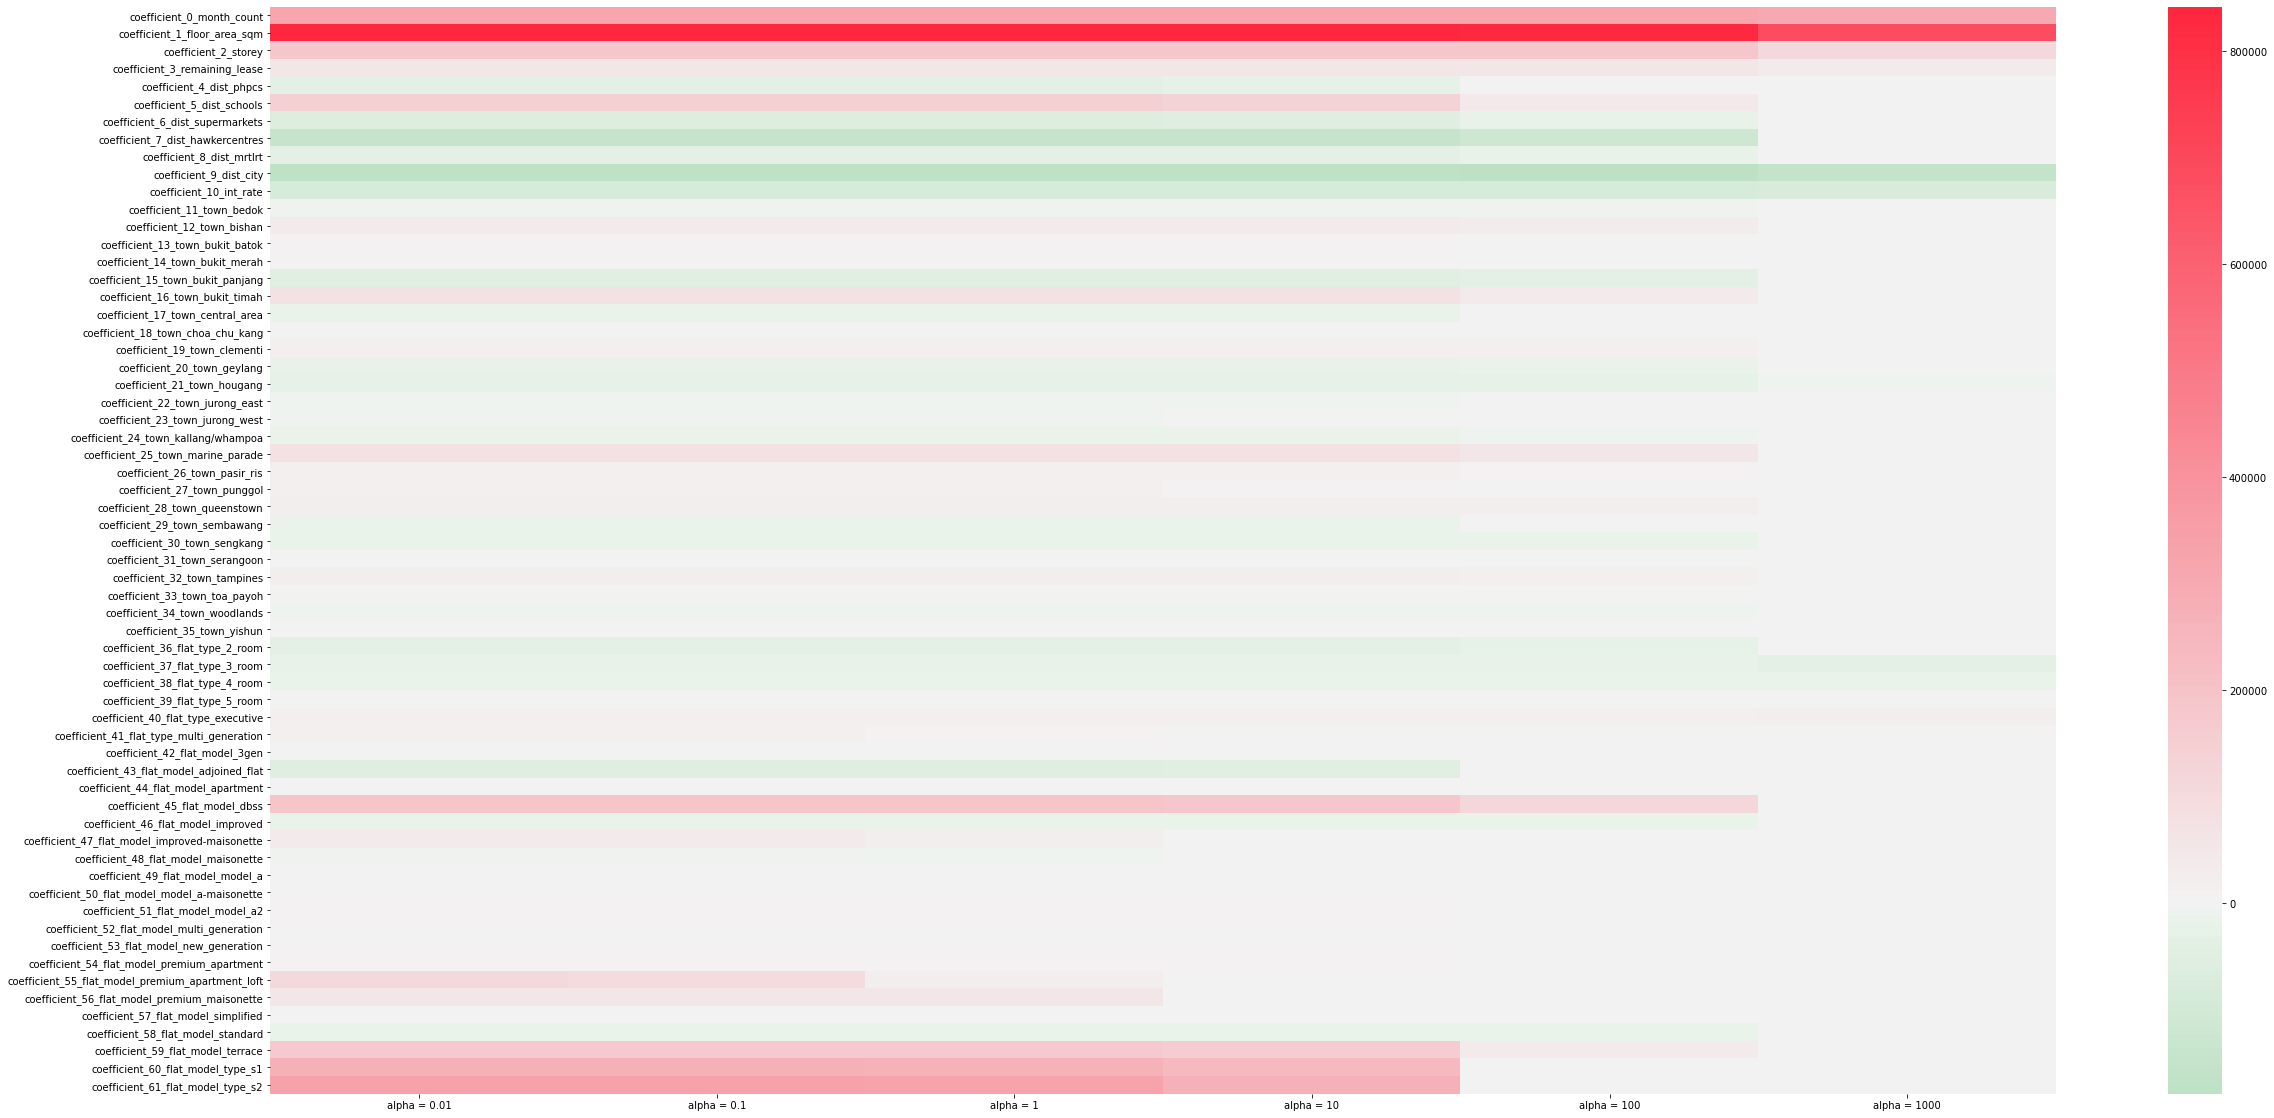

In [8]:
alpha_cols = ['alpha = 0.01', 'alpha = 0.1', 'alpha = 1', 'alpha = 10', 'alpha = 100', 'alpha = 1000']

lasso_coef_df = pd.DataFrame.from_dict(dict(zip(alpha_cols, lasso_model_coefs)))

lasso_coef_df = lasso_coef_df.set_index(pd.Series([f'coefficient_{i - 4}_{x_train.columns[i - 4]}' for i in range(4, len(x_train.columns) + 4)]))

fig, ax = plt.subplots(figsize = (40, 20))

rdgn = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)

ax = sns.heatmap(lasso_coef_df, cmap=rdgn, center=0.00)


In [9]:
ridge_model_outputs = []

ridge_model_coefs = []

for i in range(len(alpha)):
    
    linear_ridge[i].fit(x_train, y_train)
    
    y_predict = linear_ridge[i].predict(x_test)
    
    mse = mean_squared_error(y_test, y_predict)
    
    r2 = linear_ridge[i].score(x_test, y_test)
    
    cplxy = sum([j ** 2 for j in linear_ridge[i].coef_]) 
    
    ridge_model_performance_attributes = [r2, mse, cplxy,  mse + alpha[i] * cplxy]
    
    ridge_model_coefs.append(linear_ridge[i].coef_)
    
    [ridge_model_performance_attributes.append(i) for i in linear_ridge[i].coef_]
    
    ridge_model_outputs.append(ridge_model_performance_attributes)
    
    print('Trained')

ridge_model_outputs_t = np.transpose(ridge_model_outputs)

ridge_model_table = pd.DataFrame(ridge_model_outputs_t, columns = ['alpha = 0.01', 'alpha = 0.1', 'alpha = 1', 'alpha = 10', 'alpha = 100', 'alpha = 1000'])

ridge_model_table = ridge_model_table.rename(index = table_index)

print(ridge_model_table.to_string())

Trained
Trained
Trained
Trained
Trained
Trained
                                                   alpha = 0.01   alpha = 0.1     alpha = 1    alpha = 10   alpha = 100  alpha = 1000
R2                                                 7.130059e-01  7.129928e-01  7.128888e-01  7.122633e-01  7.080445e-01  6.789678e-01
MSE                                                8.059038e+09  8.059406e+09  8.062324e+09  8.079889e+09  8.198358e+09  9.014856e+09
Model Complexity                                   7.769176e+11  7.743100e+11  7.612453e+11  7.177872e+11  5.251075e+11  2.612632e+11
Regularized Cost                                   1.582821e+10  8.549041e+10  7.693076e+11  7.185952e+12  5.251895e+13  2.612722e+14
Coefficient 0: month_count                         3.492704e+05  3.492658e+05  3.492197e+05  3.487294e+05  3.436134e+05  3.104731e+05
Coefficient 1: floor_area_sqm                      4.877188e+05  4.875996e+05  4.863636e+05  4.736608e+05  3.737877e+05  1.492223e+05
Coefficient 2:

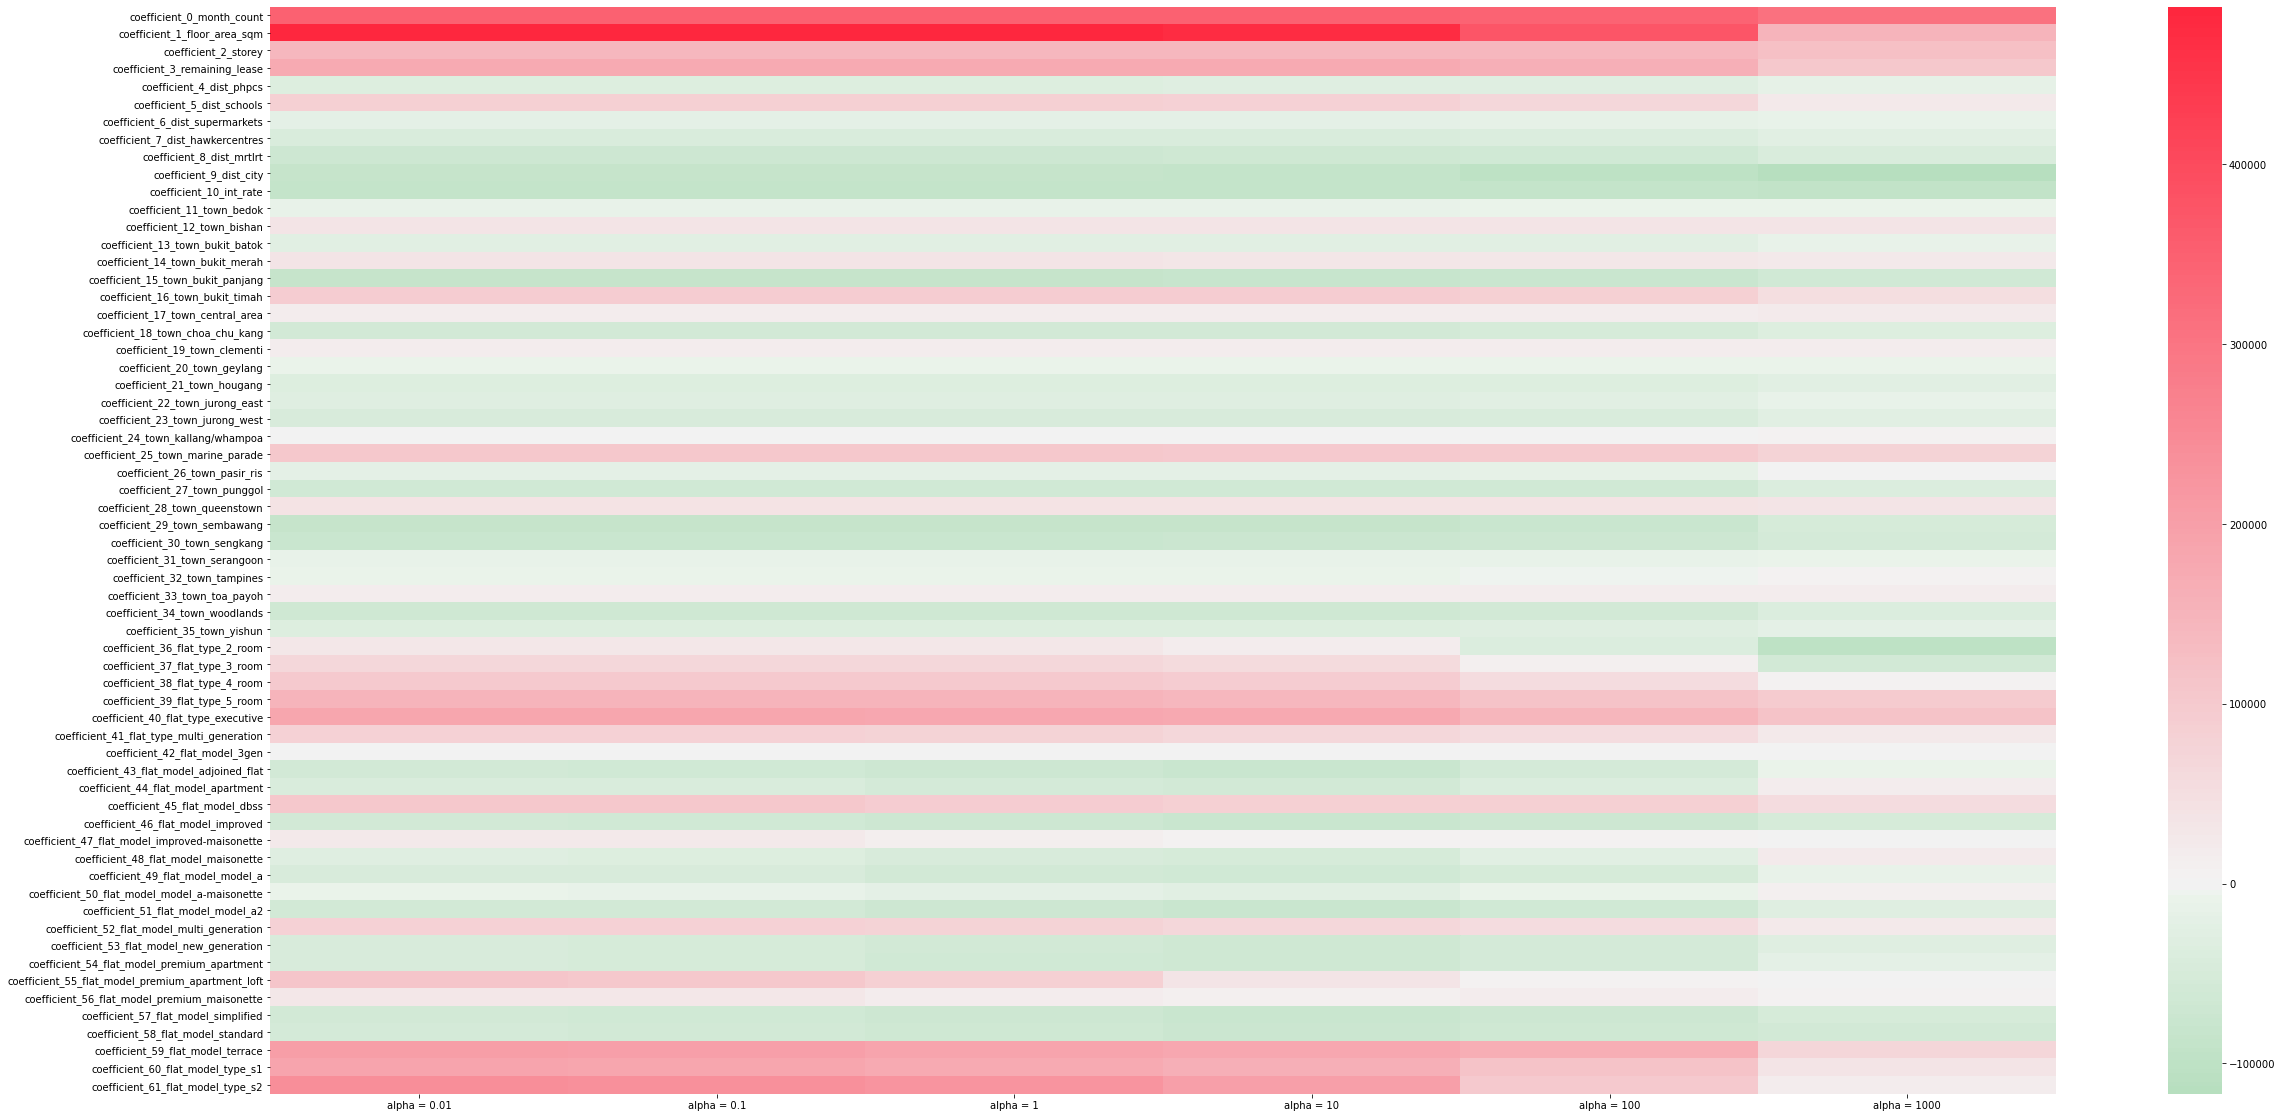

In [10]:
alpha_cols = ['alpha = 0.01', 'alpha = 0.1', 'alpha = 1', 'alpha = 10', 'alpha = 100', 'alpha = 1000']

ridge_coef_df = pd.DataFrame.from_dict(dict(zip(alpha_cols, ridge_model_coefs)))

ridge_coef_df = ridge_coef_df.set_index(pd.Series([f'coefficient_{i - 4}_{x_train.columns[i - 4]}' for i in range(4, len(x_train.columns) + 4)]))

fig, ax = plt.subplots(figsize = (40, 20))

rdgn = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)

ax = sns.heatmap(ridge_coef_df, cmap=rdgn, center=0.00)
